# Examen Data Science & AI

| | |
| :--- | :--- |
| **Examenreeks** | Voorbeeldexamen |
| **Student:** | VUL HIER JE NAAM IN |
| **Studentennummer:** | VUL HIER JE STUDENTENNUMMER IN |
| **Datum & uur:** | EXAMENDATUM, STARTUUR |
| **Klasgroep:** | VUL HIER JE KLASGROEP IN |
| **IOEM-student:** | NEE |

Add code cells where necessary to work out the questions.  
**Please note that the contents of the code blocks are not considered as answers! Only what you write in the Markdown cells provided, counts as an answer! The contents of the code blocks only serve to substantiate your answer, so that we can see what you did to get your answer should it not match the expected outcome.

!! The exam will be in dutch for all students not enrolled in the IC !!

In [ ]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Enkel relevant voor Google Colab:
# # Als je VS Code gebruikt, kan je deze cel verwijderen of in commentaar zetten.
# from google.colab import drive
# drive.mount('/content/gdrive')

## Question 1

Suppose we have a dataset containing log data from a web server. Each row contains information from an HTTP request sent to the server, including the following information:

1. Timestamp of the HTTP request (in Unix time, number of seconds since 1970-01-01)
2. The type of HTTP request (GET, PUT, HEAD, DELETE, ...)
3. Response time (in ms)
4. The status of the response (2xx, 4xx, 5xx, ...)

What is the measurement level of each of these variables?

## Answers Question 1


1. Timestamp van de HTTP-request
Meetniveau: Interval
Dit is een numerieke variabele die tijd in seconden meet vanaf een vaste startdatum (1970-01-01). Er is een betekenisvol verschil en interval tussen waarden, maar geen natuurlijk nulpunt (nul betekent hier een tijdstip, geen afwezigheid van tijd).

2. Type HTTP-request (GET, PUT, HEAD, DELETE, …)
Meetniveau: Nominaal
Dit zijn categorieën zonder intrinsieke volgorde, dus een nominale categorische variabele.

3. Responsetijd (in milliseconden)
Meetniveau: Ratio
Dit is een continue numerieke variabele met een natuurlijk nulpunt (0 ms betekent geen tijd verstreken), waarbij verhoudingen tussen waarden zinvol zijn.

4. Status van de response (2xx, 4xx, 5xx, …)
Meetniveau: Nominaal
Dit zijn categorieën die verschillende soorten HTTP-responsstatuscodes representeren. Hoewel de codes numeriek zijn, representeren ze kwalitatieve categorieën zonder meetbare volgorde.



## Question 2

For a survey in a school with 100 boys and 100 girls, the following method is used to form a sample:

- All boys and girls are sorted into two rows according to their height
- A coin is tossed
    - With cross, the first boy from the boys' row is chosen
    - At coin, the first girl is chosen from the girls' row.
- This is repeated until 10 pupils are selected.

<hr/>

1. Is this a random sample? Explain.
2. What type of error is being made here?
3. Is this a good sample? Explain.

## Answers Question 2

1. Is dit een random sample?
Nee, dit is geen volledig random sample. Hoewel er een toevalsmechanisme (munt/worp) is om te bepalen van welke rij iemand wordt gekozen, worden de personen niet willekeurig gekozen binnen de rijen. De selectie is systematisch: telkens de eerste persoon in de rij wordt gekozen, waarbij de rijen gesorteerd zijn op lengte. Dit introduceert een patroon en geen volledige willekeur.
2. Welk type fout wordt hier gemaakt?
Dit is een voorbeeld van selectiebias of sampling bias. Omdat de volgorde van selectie afhankelijk is van gesorteerde rijen, is de kans dat iemand wordt gekozen niet gelijk voor alle leerlingen, waardoor het sample niet representatief is.
3. Is dit een goed sample?
Nee, het is geen goed sample. Door de systematische selectie op basis van lengte en het telkens kiezen van de eerste persoon in de rij, zullen vooral leerlingen met extreme lengtes (bijvoorbeeld de langste of kortste) vaker gekozen worden. Dit leidt tot een niet-representatief sample dat de populatie niet goed weerspiegelt.

## Question 3

In a basket are seven fruits, 4 oranges and 3 lemons. You take ...

(1) just one fruit. What is the probability that this is an orange?  
(2) one fruit and then another without putting the first one back. What is the probability that the two fruits taken are both oranges?  
(3) two fruits, one after one and without putting it back. What is the probability that the second fruit is an orange?  
(4) a first fruit, without looking! Then take another one from the basket without putting the first one back. This second fruit is an orange. Now what is the probability that the first fruit is an orange?

## Answers Question 3

1. De kans dat één willekeurige vrucht een sinaasappel is:
Er zijn 4 sinaasappels van de 7 vruchten, dus de kans is 4/7
2. Daarna blijven er 3 sinaasappels over van de 6 vruchten, dus: 4/7 * 3/6 = 2/7
3. Kans dat de tweede vrucht een sinaasappel is (zonder terugleggen):
We moeten het gewogen gemiddelde nemen van de mogelijke situaties:
Eerste is sinaasappel: dan 3/6 kans op sinaasappel als tweede
Eerste is citroen: dan 4/6 kans op sinaasappel als tweede
4/7  * 3/6 + 3/7 + 4/6 = 4/7
4. De eerste vrucht was een sinaasappel, dan is de kans dat de tweede ook een sinaasappel is 3/6. De totale kans op dit scenario is 4/7*3/6 = 12/42
De eerste vrucht was een citroen, dan is de kans dat de tweede een sinaasappel is 4/6. De totale kans op dit scenario is 3/7 * 4/6 = 12/42.
Totale kans = 12/42 + 12/42 = 24/42.
(12/42) / (24/42) = 1/2

## Question 4

The diameter of pistons produced in a factory are _D_ cm where _D_ ~ Nor(13.4, 0.12)

(1) The tolerance specified for the pistons is that the diameter needs to be at least 13.35 cm and not more than 13.5 cm. What proportion of the production in the factory meets these tolerance limits?  
(2) Three pistons are chosen at random. What is the probability that none of them meet the tolerance limits  
(3) A sample of 20 pistons is taken at random. The mean value for the diameter is found to be 13.43 cm. Test at the 5% significance level whether any modifications have been made to the machine producing the pistons.


In [1]:
import scipy.stats as stats
import math

# Gegeven waarden
mu = 13.4
sigma = 0.12
n = 20
sample_mean = 13.43
alpha = 0.05

# (1) Proportie binnen tolerantie [13.35, 13.5]
lower, upper = 13.35, 13.5
p_lower = stats.norm.cdf((lower - mu) / sigma)
p_upper = stats.norm.cdf((upper - mu) / sigma)
proportion_in_tolerance = p_upper - p_lower
print(f"(1) Proportie binnen tolerantie: {proportion_in_tolerance:.4f}")

# (2) Kans dat 3 pistons allemaal buiten tolerantie zijn
p_outside = 1 - proportion_in_tolerance
prob_all_outside = p_outside ** 3
print(f"(2) Kans dat 3 pistons buiten tolerantie zijn: {prob_all_outside:.4f}")

# (3) Hypothesetest over de machine (z-toets)
z = (sample_mean - mu) / (sigma / math.sqrt(n))
z_crit = stats.norm.ppf(1 - alpha/2)
print(f"(3) z-waarde: {z:.4f}, kritieke waarde: ±{z_crit:.4f}")

if abs(z) > z_crit:
    print("=> Verwerp H0: er is bewijs dat de machine gewijzigd is.")
else:
    print("=> Verwerp H0 niet: onvoldoende bewijs voor wijziging machine.")


(1) Proportie binnen tolerantie: 0.4592
(2) Kans dat 3 pistons buiten tolerantie zijn: 0.1582
(3) z-waarde: 1.1180, kritieke waarde: ±1.9600
=> Verwerp H0 niet: onvoldoende bewijs voor wijziging machine.


## Answers Question 4

...

## Question 5

The number of employees on the payroll at a food processing company is recorded at the beginning of each month.
These data are given below.

1. Give the data types of both columns
2. Convert the 'date' column to datetime type. Even if this fails you can continue working.
3. Create the following plot.

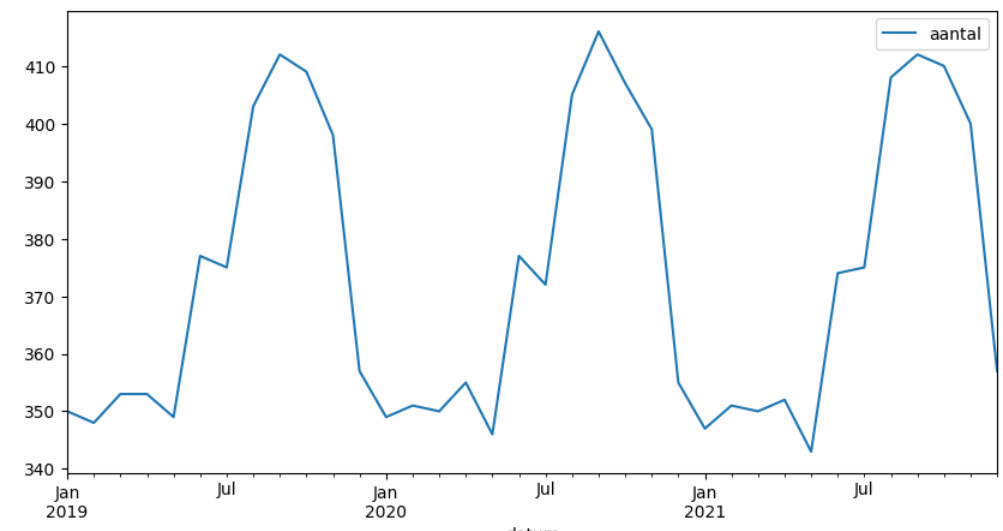

4. Make a forecast for the first four months of the next year using the most appropriate method. Explain why you chose this method.
5. Make a plot including the forecast.
6. Make the following calculations
- 6.1 Calculate the average number of employees in 2020
- 6.2 How many months did the company have more than 400 employees?




Datatype 'recording_date': object
Datatype 'number': int64

Na conversie:
   recording_date  number
0     2019-01-01     350
1     2019-02-01     348
2     2019-03-01     353
3     2019-04-01     353
4     2019-05-01     349


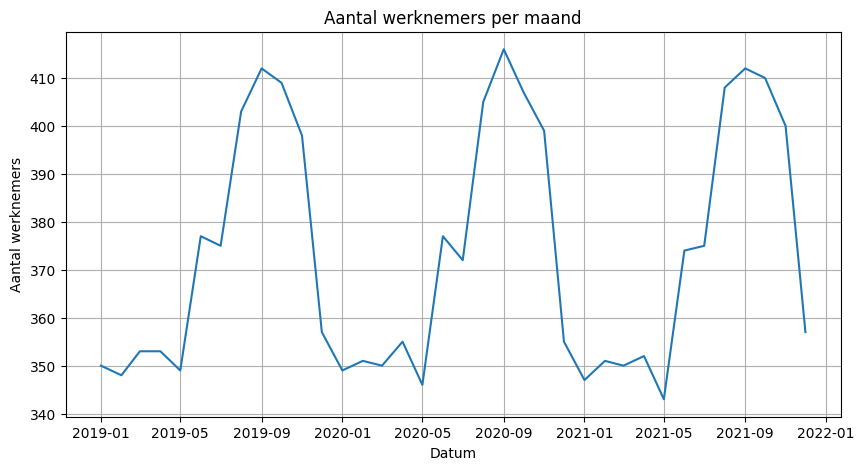


Forecast voor eerste vier maanden volgend jaar:
2022-01-01    357.199849
2022-02-01    357.399697
2022-03-01    357.599544
2022-04-01    357.799392
Freq: MS, dtype: float64


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


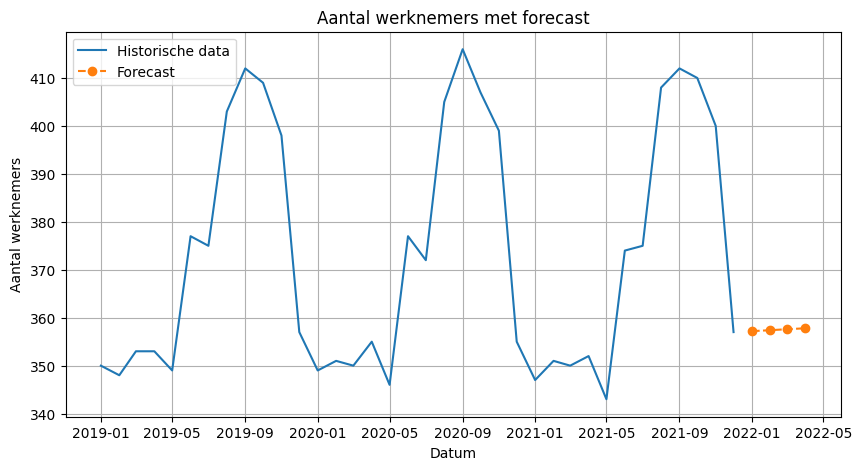


Gemiddeld aantal werknemers in 2020: 373.50
Aantal maanden met meer dan 400 werknemers: 9


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data laden
dfemployees = pd.DataFrame(data={
    'recording_date': ['2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01',
                       '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01',
                       '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01'],
    'number': [350,348,353,353,349,377,375,403,412,409,398,357,349,351,350,355,346,377,372,405,416,407,399,355,347,351,350,352,343,374,375,408,412,410,400,357]
})

# 1. Datatypes van kolommen
print("Datatype 'recording_date':", dfemployees['recording_date'].dtype)
print("Datatype 'number':", dfemployees['number'].dtype)

# 2. Converteren van 'recording_date' naar datetime
dfemployees['recording_date'] = pd.to_datetime(dfemployees['recording_date'], errors='coerce')  # errors='coerce' zet ongeldige data op NaT
print("\nNa conversie:\n", dfemployees.head())

# 3. Plot maken
plt.figure(figsize=(10,5))
plt.plot(dfemployees['recording_date'], dfemployees['number'])
plt.title('Aantal werknemers per maand')
plt.xlabel('Datum')
plt.ylabel('Aantal werknemers')
plt.grid(True)
plt.show()

# 4. Forecast maken (Holt-Winters exponentiële smoothing) - geschikt voor tijdreeksen met trend en seizoenspatronen
# Hier weinig seizoenspatroon zichtbaar, dus enkel trendmodel (additive trend)
dfemployees.set_index('recording_date', inplace=True)
model = ExponentialSmoothing(dfemployees['number'], trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(4)  # eerste 4 maanden van volgend jaar (2022-01 t/m 2022-04)

print("\nForecast voor eerste vier maanden volgend jaar:")
print(forecast)

# 5. Plot inclusief forecast
plt.figure(figsize=(10,5))
plt.plot(dfemployees.index, dfemployees['number'], label='Historische data')
plt.plot(forecast.index, forecast.values, label='Forecast', marker='o', linestyle='--')
plt.title('Aantal werknemers met forecast')
plt.xlabel('Datum')
plt.ylabel('Aantal werknemers')
plt.legend()
plt.grid(True)
plt.show()

# 6. Berekeningen
# 6.1 Gemiddeld aantal werknemers in 2020
avg_2020 = dfemployees['2020-01-01':'2020-12-31']['number'].mean()
print(f"\nGemiddeld aantal werknemers in 2020: {avg_2020:.2f}")

# 6.2 Aantal maanden met meer dan 400 werknemers
months_above_400 = (dfemployees['number'] > 400).sum()
print(f"Aantal maanden met meer dan 400 werknemers: {months_above_400}")


## Question 6

The sample given below contains measurement results of a variable Temperature at two time points (`time1` and `time2`). We want to know whether the measurements at the second time point are significantly different from those at the first time point.

Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What statistical test should you use to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis.
4. Calculate the p-value.
5. Draw a conclusion based on the previous step and formulate an answer to the research question.
6. Give for the observations at time `time1`:
    1. The interquartile range
    2. The kurtosis
    3. The range
    4. The standard deviation

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11772\1075583349.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([temperatures['time1'], temperatures['time2']], labels=['time1', 'time2'])


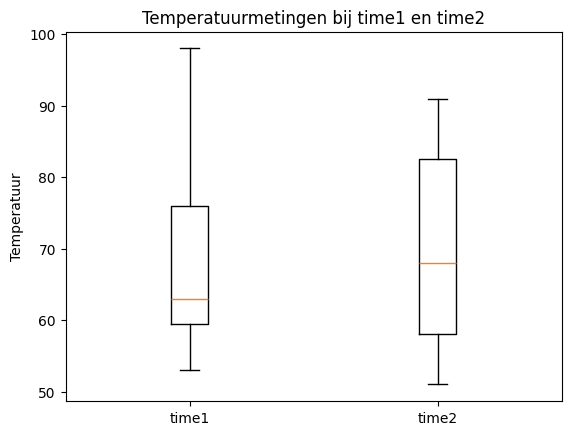

t-statistiek: 0.1610, p-waarde: 0.8744
We verwerpen H0 niet: geen significant verschil tussen time1 en time2.

Statistieken voor time1:
Interkwartielafstand (IQR): 16.50
Kurtosis: -0.26
Range: 45
Standaarddeviatie: 13.10


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

temperatures = pd.DataFrame({
  'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
  'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})

# 1. Visualisatie
plt.boxplot([temperatures['time1'], temperatures['time2']], labels=['time1', 'time2'])
plt.title('Temperatuurmetingen bij time1 en time2')
plt.ylabel('Temperatuur')
plt.show()

# Inference: De boxplot toont dat de medianen en spreiding van beide tijdstippen verschillen, mogelijk een verandering in temperatuur.

# 2. Statistische test
# Omdat het dezelfde objecten zijn op twee tijdstippen: gepaarde steekproef.
# Gebruik een gepaarde t-toets (paired t-test).

# 3. Hypothesen:
# H0: Het gemiddelde verschil tussen time2 en time1 is 0 (geen verandering)
# H1: Het gemiddelde verschil is niet 0 (er is een verandering)

# 4. P-waarde berekenen
t_stat, p_value = stats.ttest_rel(temperatures['time2'], temperatures['time1'])
print(f"t-statistiek: {t_stat:.4f}, p-waarde: {p_value:.4f}")

# 5. Conclusie
if p_value < 0.05:
    print("We verwerpen H0: de temperatuurmetingen bij time2 zijn significant verschillend van time1.")
else:
    print("We verwerpen H0 niet: geen significant verschil tussen time1 en time2.")

# 6. Statistieken voor time1
iqr = stats.iqr(temperatures['time1'])
kurtosis = stats.kurtosis(temperatures['time1'], fisher=True)  # Fisher's definitie (nul bij normaal)
data_range = temperatures['time1'].max() - temperatures['time1'].min()
std_dev = temperatures['time1'].std()

print(f"\nStatistieken voor time1:")
print(f"Interkwartielafstand (IQR): {iqr:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")
print(f"Range: {data_range}")
print(f"Standaarddeviatie: {std_dev:.2f}")


## Answers Question 6

1. De boxplot laat zien dat de medianen en spreidingen van time1 en time2 vergelijkbaar zijn, zonder duidelijke visuele aanwijzing voor een groot verschil. Dit suggereert dat er mogelijk geen significant verschil is tussen de twee meetmomenten.

2. De gepaarde t-toets (paired t-test) is geschikt omdat we dezelfde objecten op twee tijdstippen meten en we het gemiddelde verschil willen testen.

3. 
- H0: Het gemiddelde verschil tussen time2 en time1 is 0 (geen verandering).
- H1: Het gemiddelde verschil is niet 0 (er is een verandering).

4. De berekende p-waarde is 0.8744.

5. Omdat de p-waarde veel groter is dan 0.05, verwerpen we H0 niet. Er is geen statistisch significant verschil tussen de temperatuurmetingen bij time1 en time2.

6. Voor de observaties bij time1:
   1. Interkwartielafstand (IQR): 16.50
   2. Kurtosis: -0.26
   3. Range: 45
   4. Standaarddeviatie: 13.10


## Question 7

The figure below shows a graph of a time series.  The observations are plotted in black with a solid line. In addition, three forms of moving average are plotted.

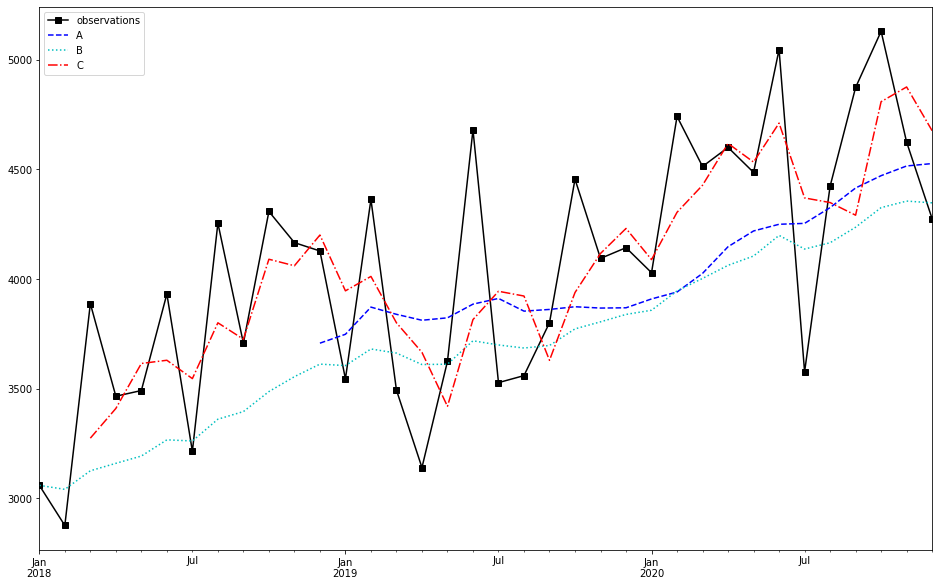

For each (A, B, C), indicate exactly what form of moving average is involved. Choose from the options given below:

- Simple moving average with period 3
- Simple moving average with period 12
- Simple exponential smoothing with $alpha = 0.1$
- Simple exponential smoothing with $alpha = 0.9$

If you had to set up a model for this time series based on exponential smoothing, which one would you use? Explain shortly your answer.

## Answers question 7

1. A (purple, - - - -):
2. B (cyan, ....):
3. C (red, - . - .):
4. The most appropriate form of exponential smoothing is ... because ...


## Question 8

Given last year's mileage and maintenance costs of 23 trucks.

(1) Make the plot below (In the Answers, give the command for this plot)

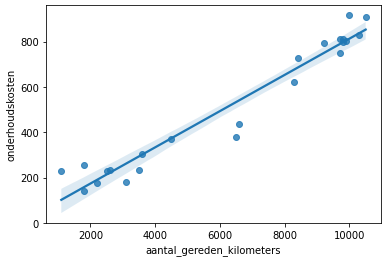

(2) Give the equation of the line   
(3) Calculate the correlation coefficient (symbol + value)  
(4) Formulate an interpretation for the value of the correlation coefficient  
(5) Approximately how much will be the maintenance cost of a truck driving 5000 kilometres.  
(6) What will be the approximate fixed cost of a truck even if it has not driven a single kilometre?  



In [ ]:
sample_data = pd.DataFrame(data = {
    'mileage': [10500, 9700, 9200, 8300, 6500, 4500, 3500, 2200, 1800, 9800, 6600, 3600, 2500, 3100, 8400, 9700, 1800, 10000, 9800, 9900, 1100, 2600, 10300],
    'maintenance costs': [908.56, 751.12, 793.55, 619.61, 380.11, 368.72, 235.32, 174.93, 256.30, 799.58, 436.04, 304.25, 226.81, 179.68, 726.65, 810.53, 142.53, 915.53, 812.45, 803.78, 227.32, 231.46, 829.21]})

## Answers Question 8


1.
2.
3.
4.
5.


## Question 9

You recently offered samples of three products to every customer who entered your business. You then asked which product customers liked best. You recorded these preferences for Product A, Product B and Product C in the dataset given below.

Do customers have a distinct preference for any of these products? Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What hypothesis test will you apply to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis
4. Calculate the appropriate test statistic (test statistic) for this test. Give the symbol and value
5. Calculate the p-value
6. Draw a conclusion based on the previous step and formulate an answer to the research question.

In [ ]:
products = pd.DataFrame(data={'Choice': [
  "Product A","Product A","Product B","Product B","Product C",
  "Product B","Product B","Product B","Product C","Product B",
  "Product C","Product A","Product C","Product B","Product C",
  "Product B","Product C","Product C","Product C","Product B",
  "Product C","Product C","Product B","Product C","Product B",
  "Product B","Product B","Product B","Product A","Product B",
  "Product B","Product B","Product B","Product B","Product C",
  "Product C","Product B","Product C","Product C","Product A",
  "Product C","Product C","Product B","Product B","Product B",
  "Product B","Product C","Product C","Product C","Product C",
  "Product C","Product B","Product A","Product C","Product C",
  "Product B","Product B","Product C","Product C","Product C",
  "Product B","Product C","Product B","Product B","Product C",
  "Product B","Product B","Product C","Product C","Product B",
  "Product C","Product C","Product C","Product B","Product B",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product B"
]})

## Answers Question 9


1.
2.
3.
4.
5.
6.